Predict Loan Eligibility for Dream Housing Finance company

Dream Housing Finance company deals in all kinds of home loans.
They have presence across all urban, semi urban and rural areas.
Customer first applies for home loan and after that company
validates the customer eligibility for loan.

Company wants to automate the loan eligibility process (real time) based on customer detail provided while filling online application form. 
These details are Gender, Marital Status, Education, Number of Dependents, Income, Loan Amount, Credit History and others.
To automate this process, they have provided a dataset to identify the customers 
segments that are eligible for loan amount so that they can specifically target these customers. 



In [105]:
#  Data Dictionary
# Train file: CSV containing the customers for whom loan eligibility is known as 'Loan_Status'

# Variable	Description
# Loan_ID	Unique Loan ID
# Gender	Male/ Female
# Married	Applicant married (Y/N)
# Dependents	Number of dependents
# Education	Applicant Education (Graduate/ Under Graduate)
# Self_Employed	Self employed (Y/N)
# ApplicantIncome	Applicant income
# CoapplicantIncome	Coapplicant income
# LoanAmount	Loan amount in thousands
# Loan_Amount_Term	Term of loan in months
# Credit_History	credit history meets guidelines
# Property_Area	Urban/ Semi Urban/ Rural
# Loan_Status	(Target) Loan approved (Y/N)


# Test file: CSV containing the customer information for whom loan eligibility is to be predicted

# Variable	Description
# Loan_ID	Unique Loan ID
# Gender	Male/ Female
# Married	Applicant married (Y/N)
# Dependents	Number of dependents
# Education	Applicant Education (Graduate/ Under Graduate)
# Self_Employed	Self employed (Y/N)
# ApplicantIncome	Applicant income
# CoapplicantIncome	Coapplicant income
# LoanAmount	Loan amount in thousands
# Loan_Amount_Term	Term of loan in months
# Credit_History	credit history meets guidelines
# Property_Area	Urban/ Semi Urban/ Rural


# Submission file format

# Variable	Description
# Loan_ID	Unique Loan ID
# Loan_Status	(Target) Loan approved (Y/N)

Evaluation Metric
Your model performance will be evaluated on the basis of your prediction of loan status 
for the test data (test.csv), which contains similar data-points as train except for the loan 
status to be predicted. 
Your submission needs to be in the format as shown in sample submission.

We at our end, have the actual loan status for the test dataset, 
against which your predictions will be evaluated. 
We will use the Accuracy value to judge your response.



Public and Private Split
Test file is further divided into Public (25%) and Private (75%)

Your initial responses will be checked and scored on the Public data.
The final rankings would be based on your private score which will be published once the 
competition is over.

In [106]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns 
from sklearn import preprocessing

In [107]:
loan_data = pd.read_csv('train_data.csv')
loan_data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [108]:
loan_test  = pd.read_csv('test_data.csv')
loan_test.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban


In [109]:
loan_data.shape

(614, 13)

In [110]:
loan_test.shape

(367, 12)

In [111]:
loan_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [112]:
loan_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 367 entries, 0 to 366
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            367 non-null    object 
 1   Gender             356 non-null    object 
 2   Married            367 non-null    object 
 3   Dependents         357 non-null    object 
 4   Education          367 non-null    object 
 5   Self_Employed      344 non-null    object 
 6   ApplicantIncome    367 non-null    int64  
 7   CoapplicantIncome  367 non-null    int64  
 8   LoanAmount         362 non-null    float64
 9   Loan_Amount_Term   361 non-null    float64
 10  Credit_History     338 non-null    float64
 11  Property_Area      367 non-null    object 
dtypes: float64(3), int64(2), object(7)
memory usage: 34.5+ KB


In [113]:
loan_data.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [114]:
loan_test.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,367.000000,367.000000,362.000000,361.000000,338.000000
mean,4805.599455,1569.577657,136.132597,342.537396,0.825444
std,4910.685399,2334.232099,61.366652,65.156643,0.380150
min,0.000000,0.000000,28.000000,6.000000,0.000000
25%,2864.000000,0.000000,100.250000,360.000000,1.000000
50%,3786.000000,1025.000000,125.000000,360.000000,1.000000
75%,5060.000000,2430.500000,158.000000,360.000000,1.000000
max,72529.000000,24000.000000,550.000000,480.000000,1.000000


In [115]:
loan_data['Dependents'].unique()

array(['0', '1', '2', '3+', nan], dtype=object)

In [116]:
loan_data['Dependents'] = loan_data['Dependents'].replace({
    '3+' : 3.5
})

In [117]:
loan_test['Dependents'] = loan_test['Dependents'].replace({
    '3+' : 3.5
})

In [118]:
loan_data['Dependents'].unique()

array(['0', '1', '2', 3.5, nan], dtype=object)

In [119]:
#Dividing the columns into categorical and numerical 
cat_col = [col for col in loan_data.columns if loan_data[col].dtype == 'object']
numerical_col = [col for col in loan_data.columns if loan_data[col].dtype != 'object']

In [120]:
cat_col_test = [col for col in loan_test.columns if loan_test[col].dtype == 'object']
numerical_col_test = [col for col in loan_test.columns if loan_test[col].dtype != 'object']

In [121]:
cat_col_test

['Loan_ID',
 'Gender',
 'Married',
 'Dependents',
 'Education',
 'Self_Employed',
 'Property_Area']

In [122]:
numerical_col_test

['ApplicantIncome',
 'CoapplicantIncome',
 'LoanAmount',
 'Loan_Amount_Term',
 'Credit_History']

In [123]:
cat_col

['Loan_ID',
 'Gender',
 'Married',
 'Dependents',
 'Education',
 'Self_Employed',
 'Property_Area',
 'Loan_Status']

In [124]:
numerical_col 

['ApplicantIncome',
 'CoapplicantIncome',
 'LoanAmount',
 'Loan_Amount_Term',
 'Credit_History']

In [125]:
loan_test.isnull().sum()

Loan_ID               0
Gender               11
Married               0
Dependents           10
Education             0
Self_Employed        23
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            5
Loan_Amount_Term      6
Credit_History       29
Property_Area         0
dtype: int64

In [126]:
# loan_test = loan_test.dropna()

In [127]:
loan_test.shape

(367, 12)

In [128]:
loan_data[numerical_col].nunique()

ApplicantIncome      505
CoapplicantIncome    287
LoanAmount           203
Loan_Amount_Term      10
Credit_History         2
dtype: int64

In [129]:
loan_data.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [130]:
#Count each null values in the row 
for i in range(len(loan_data.index)) : 
    print(" Total NaN in row", i + 1, ":", 
          loan_data.iloc[i].isnull().sum()) 

 Total NaN in row 1 : 1
 Total NaN in row 2 : 0
 Total NaN in row 3 : 0
 Total NaN in row 4 : 0
 Total NaN in row 5 : 0
 Total NaN in row 6 : 0
 Total NaN in row 7 : 0
 Total NaN in row 8 : 0
 Total NaN in row 9 : 0
 Total NaN in row 10 : 0
 Total NaN in row 11 : 0
 Total NaN in row 12 : 1
 Total NaN in row 13 : 0
 Total NaN in row 14 : 0
 Total NaN in row 15 : 0
 Total NaN in row 16 : 0
 Total NaN in row 17 : 1
 Total NaN in row 18 : 0
 Total NaN in row 19 : 0
 Total NaN in row 20 : 2
 Total NaN in row 21 : 0
 Total NaN in row 22 : 0
 Total NaN in row 23 : 0
 Total NaN in row 24 : 1
 Total NaN in row 25 : 2
 Total NaN in row 26 : 0
 Total NaN in row 27 : 0
 Total NaN in row 28 : 0
 Total NaN in row 29 : 0
 Total NaN in row 30 : 1
 Total NaN in row 31 : 2
 Total NaN in row 32 : 0
 Total NaN in row 33 : 0
 Total NaN in row 34 : 0
 Total NaN in row 35 : 0
 Total NaN in row 36 : 1
 Total NaN in row 37 : 1
 Total NaN in row 38 : 0
 Total NaN in row 39 : 0
 Total NaN in row 40 : 0
 Total Na

In [131]:
numerical_col 

['ApplicantIncome',
 'CoapplicantIncome',
 'LoanAmount',
 'Loan_Amount_Term',
 'Credit_History']

In [132]:
#Processing the data (Handling the null data)
loan_data['LoanAmount'] = loan_data['LoanAmount'].fillna(loan_data['LoanAmount'].mean()) 
loan_data['Loan_Amount_Term'] = loan_data['Loan_Amount_Term'].fillna(loan_data['Loan_Amount_Term'].mean()) 
# loan_data['Credit_History '] = loan_data['Credit_History'].fillna(method='ffill') 

In [133]:
loan_data['Credit_History '] = loan_data['Credit_History'].interpolate()


In [134]:
loan_data.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            0
Loan_Amount_Term      0
Credit_History       50
Property_Area         0
Loan_Status           0
Credit_History        0
dtype: int64

In [136]:
#Dealing with categorical null values 
loan_data[cat_col].isnull().sum()

Loan_ID           0
Gender           13
Married           3
Dependents       15
Education         0
Self_Employed    32
Property_Area     0
Loan_Status       0
dtype: int64

In [137]:
#Replace the missing data with frequent data
loan_data['Gender'] = loan_data['Gender'].fillna(method='ffill')
loan_data['Married'] = loan_data['Married'].fillna(method='ffill')
loan_data['Dependents'] = loan_data['Dependents'].fillna(method='ffill')
loan_data['Self_Employed'] = loan_data['Self_Employed'].fillna(method='ffill')

In [138]:
loan_data[cat_col].isnull().sum()

Loan_ID          0
Gender           0
Married          0
Dependents       0
Education        0
Self_Employed    0
Property_Area    0
Loan_Status      0
dtype: int64

In [139]:
#Loan test data

In [140]:
loan_test[cat_col_test].isnull().sum()

Loan_ID           0
Gender           11
Married           0
Dependents       10
Education         0
Self_Employed    23
Property_Area     0
dtype: int64

In [141]:
loan_test[numerical_col_test].isnull().sum()

ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            5
Loan_Amount_Term      6
Credit_History       29
dtype: int64

In [142]:
#Test data 
loan_test['Gender'] = loan_test['Gender'].fillna(method='ffill')
loan_test['Married'] = loan_test['Married'].fillna(method='ffill')
loan_test['Dependents'] = loan_test['Dependents'].fillna(method='ffill')
loan_test['LoanAmount'] = loan_test['LoanAmount'].fillna(method='ffill')
loan_test['Loan_Amount_Term'] = loan_test['Loan_Amount_Term'].fillna(method='ffill')
loan_test['Credit_History'] = loan_test['Credit_History'].fillna(method='ffill')
loan_test['Self_Employed'] = loan_test['Self_Employed'].fillna(method='ffill')

In [143]:
loan_test.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
dtype: int64

In [144]:
#Data visualization

In [145]:
#Test data 

<Axes: xlabel='Gender', ylabel='count'>

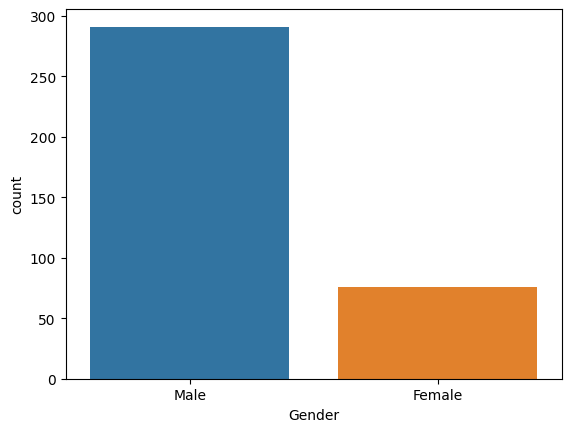

In [146]:
sns.countplot(x='Gender',data=loan_test)

<Axes: xlabel='Married', ylabel='count'>

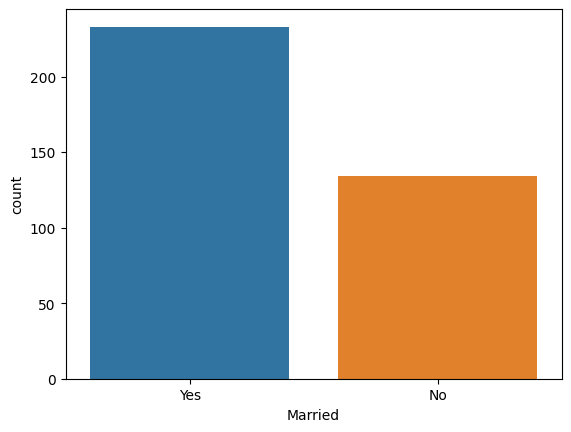

In [147]:
sns.countplot(x='Married',data=loan_test)

<Axes: xlabel='Gender', ylabel='count'>

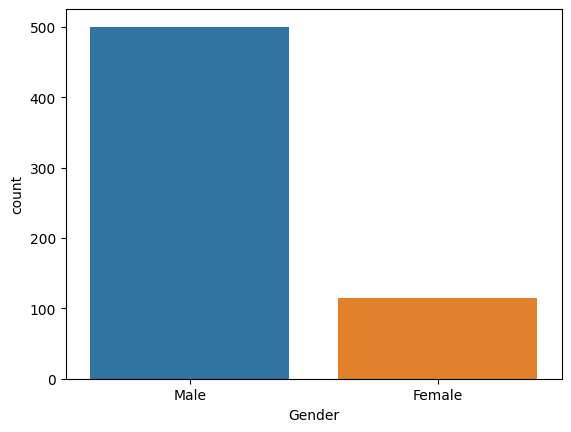

In [148]:
sns.countplot(x='Gender',data=loan_data)

<Axes: xlabel='Married', ylabel='count'>

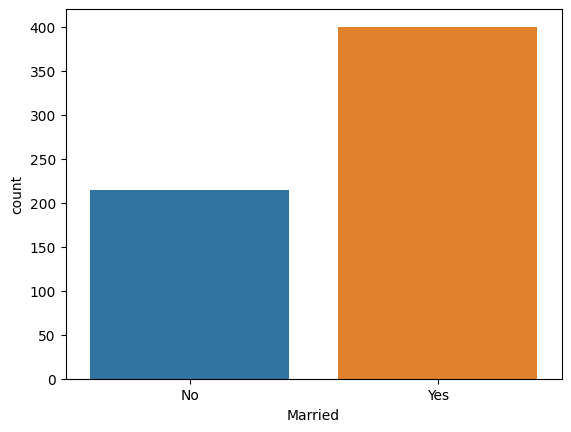

In [149]:
sns.countplot(x='Married',data=loan_data)

<Axes: xlabel='Loan_Status', ylabel='count'>

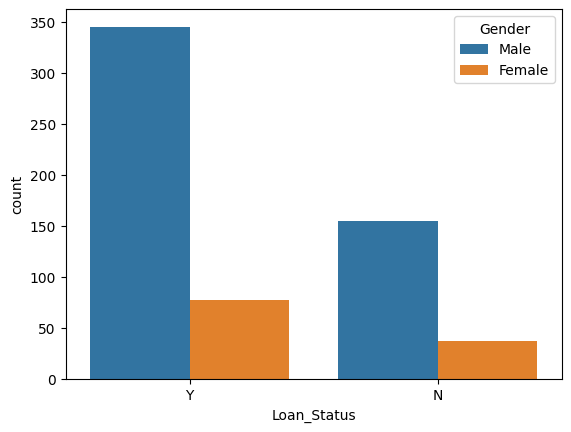

In [150]:
sns.countplot(x='Loan_Status',hue='Gender',data=loan_data)

<Axes: xlabel='Loan_Status', ylabel='count'>

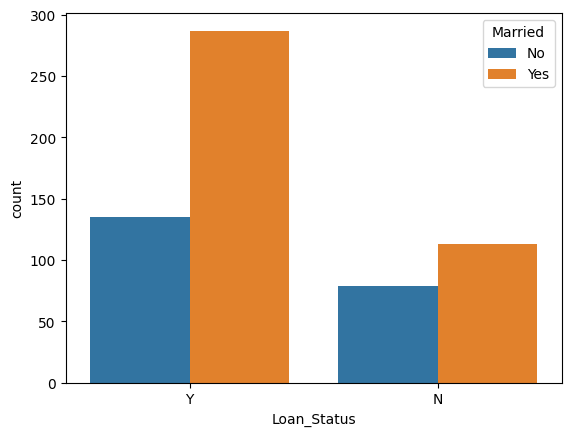

In [151]:
sns.countplot(x='Loan_Status',hue='Married',data=loan_data)

<Axes: xlabel='Education', ylabel='count'>

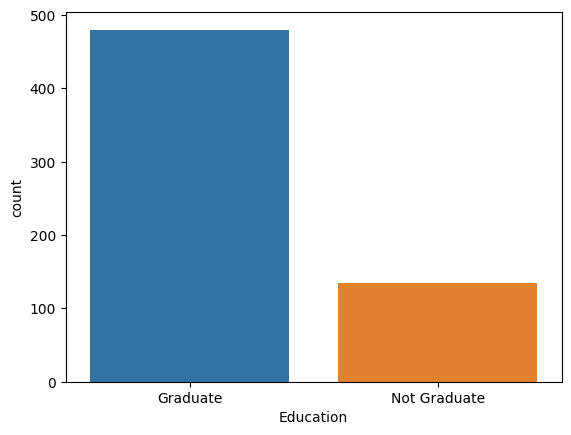

In [152]:
sns.countplot(x='Education',data=loan_data)

<Axes: xlabel='Loan_Status', ylabel='count'>

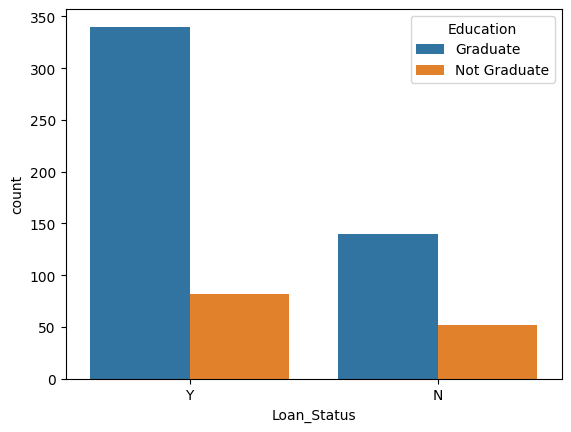

In [153]:
sns.countplot(x='Loan_Status',hue='Education',data=loan_data)

<Axes: xlabel='Property_Area', ylabel='count'>

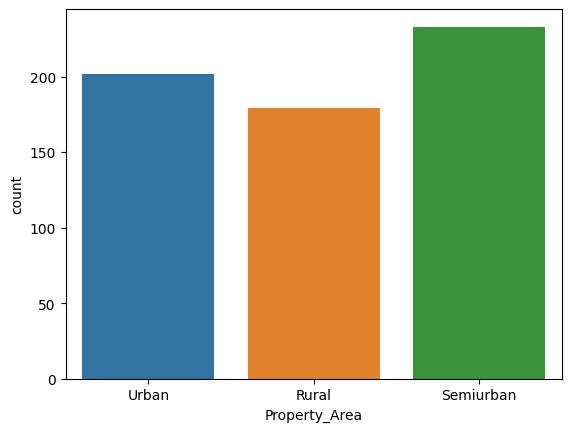

In [154]:
sns.countplot(x='Property_Area',data=loan_data)

<Axes: xlabel='Property_Area', ylabel='count'>

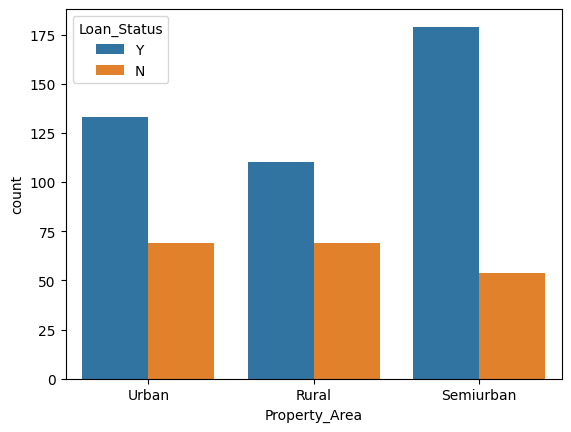

In [155]:
sns.countplot(x='Property_Area',hue='Loan_Status',data=loan_data)

<Axes: xlabel='Self_Employed', ylabel='count'>

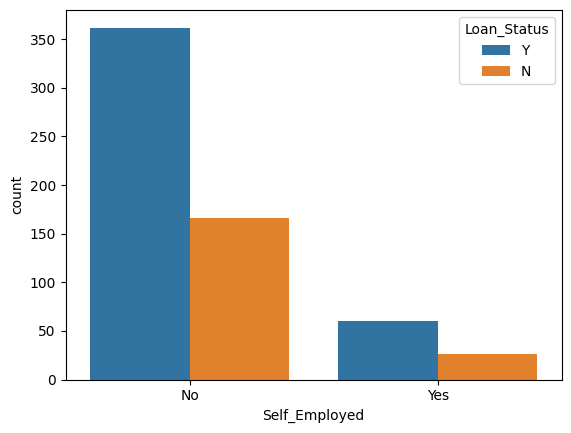

In [156]:
sns.countplot(x='Self_Employed',hue='Loan_Status',data=loan_data)

<Axes: xlabel='Dependents', ylabel='count'>

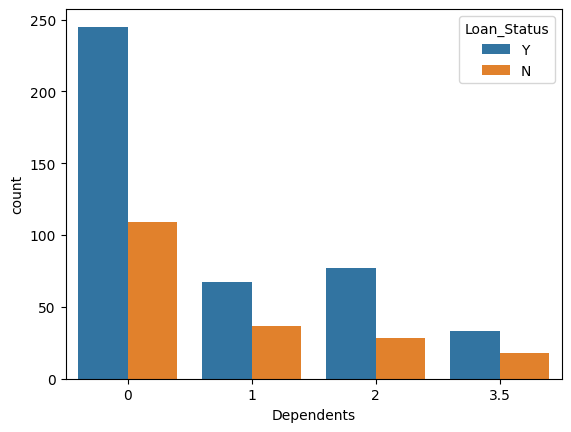

In [157]:
sns.countplot(x='Dependents',hue='Loan_Status',data=loan_data)

In [158]:
cat_col

['Loan_ID',
 'Gender',
 'Married',
 'Dependents',
 'Education',
 'Self_Employed',
 'Property_Area',
 'Loan_Status']

In [159]:
numerical_col

['ApplicantIncome',
 'CoapplicantIncome',
 'LoanAmount',
 'Loan_Amount_Term',
 'Credit_History']

<Axes: xlabel='ApplicantIncome', ylabel='Loan_Status'>

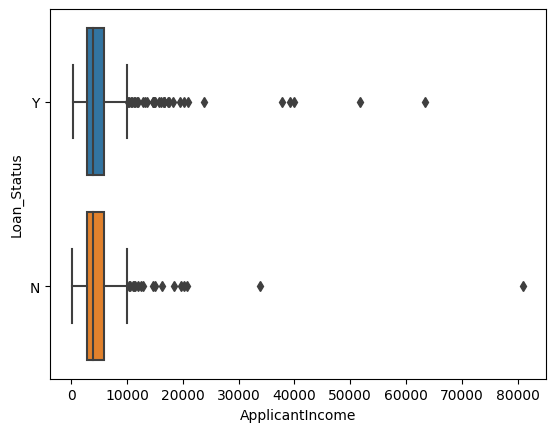

In [160]:
#Loan approval on the basis of applicant Income
sns.boxplot(data=loan_data,x=loan_data["ApplicantIncome"],y='Loan_Status')

<Axes: xlabel='ApplicantIncome', ylabel='Married'>

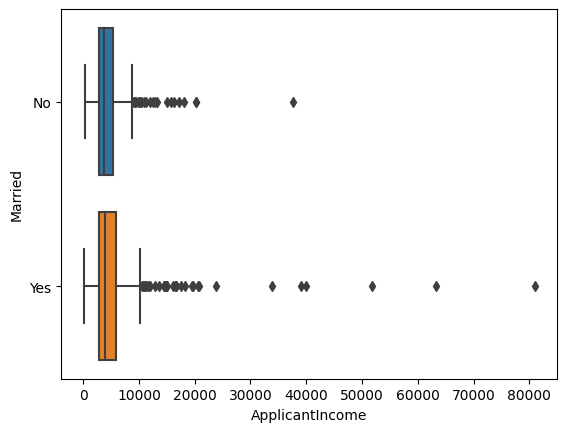

In [161]:
sns.boxplot(data=loan_data,x="ApplicantIncome",y='Married')

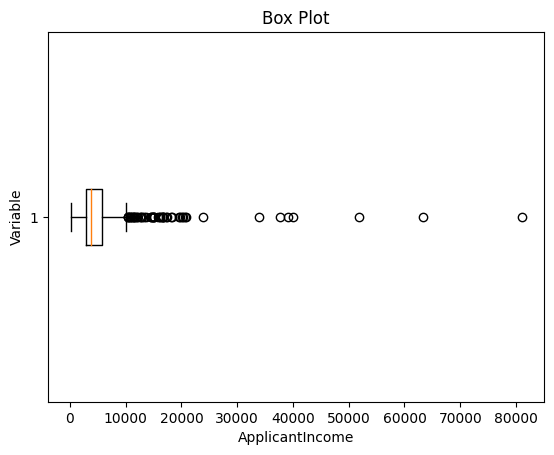

In [162]:
plt.boxplot(loan_data['ApplicantIncome'], vert=False)
plt.ylabel('Variable')
plt.xlabel('ApplicantIncome')
plt.title('Box Plot')
plt.show()

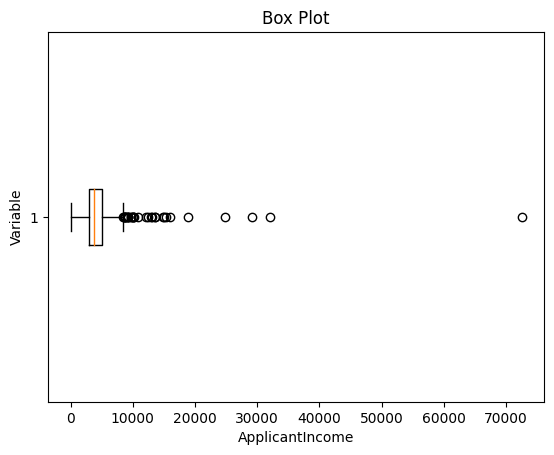

In [163]:
plt.boxplot(loan_test['ApplicantIncome'], vert=False)
plt.ylabel('Variable')
plt.xlabel('ApplicantIncome')
plt.title('Box Plot')
plt.show()

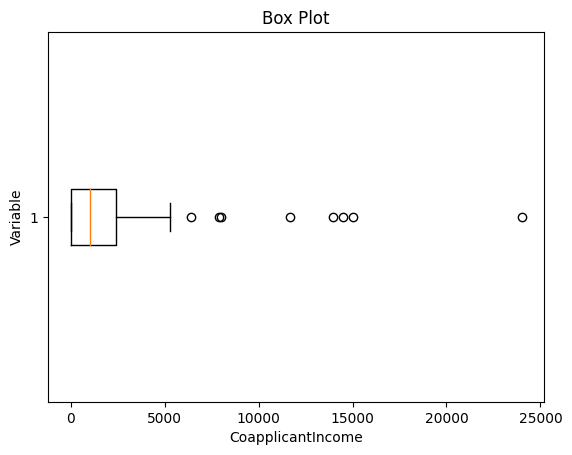

In [164]:
#loan test data 
plt.boxplot(loan_test['CoapplicantIncome'], vert=False)
plt.ylabel('Variable')
plt.xlabel('CoapplicantIncome')
plt.title('Box Plot')
plt.show()

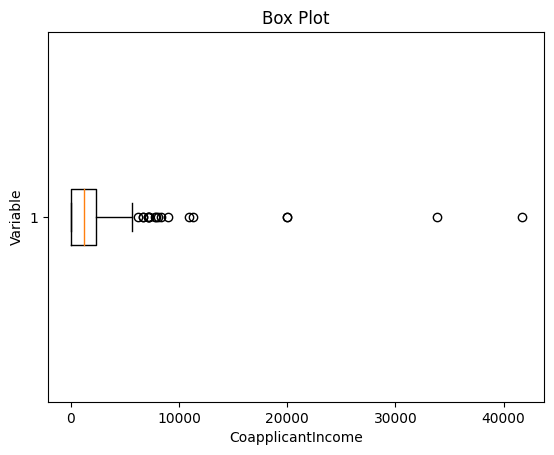

In [165]:
# CoapplicantIncome of training data 
plt.boxplot(loan_data['CoapplicantIncome'], vert=False)
plt.ylabel('Variable')
plt.xlabel('CoapplicantIncome')
plt.title('Box Plot')
plt.show()

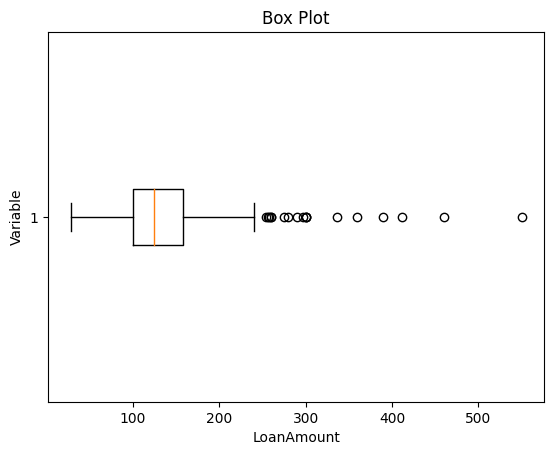

In [166]:
plt.boxplot(loan_test['LoanAmount'], vert=False)
plt.ylabel('Variable')
plt.xlabel('LoanAmount')
plt.title('Box Plot')
plt.show()

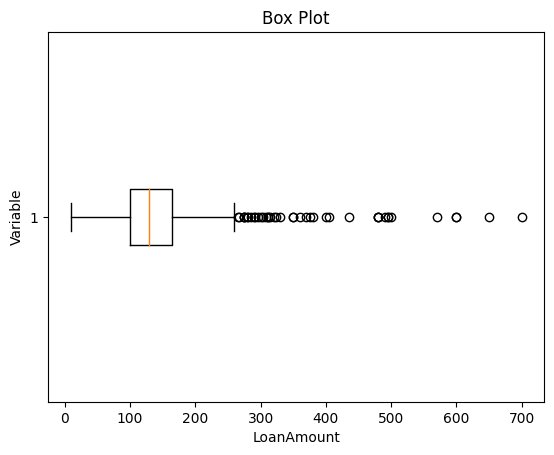

In [167]:
plt.boxplot(loan_data['LoanAmount'], vert=False)
plt.ylabel('Variable')
plt.xlabel('LoanAmount')
plt.title('Box Plot')
plt.show()

In [168]:
# Q1 = df_diabetes['bmi'].quantile(0.25)
# Q3 = df_diabetes['bmi'].quantile(0.75)
# IQR = Q3 - Q1
# lower = Q1 - 1.5*IQR
# upper = Q3 + 1.5*IQR
 
# # Create arrays of Boolean values indicating the outlier rows
# upper_array = np.where(df_diabetes['bmi'] >= upper)[0]
# lower_array = np.where(df_diabetes['bmi'] <= lower)[0]
 
# # Removing the outliers
# df_diabetes.drop(index=upper_array, inplace=True)
# df_diabetes.drop(index=lower_array, inplace=True)

In [169]:
Q1 = loan_data['ApplicantIncome'].quantile(0.25)
print(Q1)
Q3 = loan_data['ApplicantIncome'].quantile(0.75)
print(Q3)

2877.5
5795.0


In [170]:
#Inter quartile range
IQR = Q3 - Q1
print(IQR)

2917.5


In [171]:
lower = Q1 - 1.5*IQR
print(lower)
upper = Q3 + 1.5*IQR
print(upper)

-1498.75
10171.25


In [172]:
#Creating rows where the outlier exists
upper_array = np.where(loan_data['ApplicantIncome'] >= upper)[0]
print(upper_array)
lower_array = np.where(loan_data['ApplicantIncome'] <= lower)[0]
print(lower_array)

[  9  34  54  67 102 106 115 119 126 128 130 138 144 146 155 171 183 185
 191 199 254 258 271 278 284 308 324 333 369 370 409 424 432 438 443 467
 475 478 483 487 493 506 509 525 533 534 561 572 594 604]
[]


In [173]:
# Removing the outliers
loan_data.drop(index=upper_array, inplace=True)
loan_data.drop(index=lower_array, inplace=True)

In [174]:
# def outlier_removal(name):
#     Q1 = loan_data[name].quantile(0.75)
#     Q3 = loan_data[name].max()
#     IQR = Q3 - Q1
#     lower = Q1 - 1.5*IQR
#     upper = Q3 + 1.5*IQR
#     upper_array = np.where(loan_data[name] >= upper)[0]
#     lower_array = np.where(loan_data[name] <= lower)[0]
#     loan_data.drop(index=upper_array, inplace=True)
#     loan_data.drop(index=lower_array, inplace=True)
    
    

In [175]:
loan_data.shape

(564, 14)

<Axes: xlabel='Loan_Amount_Term', ylabel='count'>

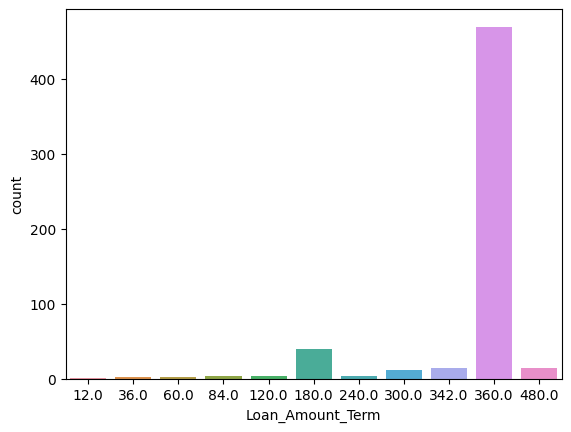

In [176]:
sns.countplot(x='Loan_Amount_Term', data=loan_data)

In [177]:
loan_data['Loan_Amount_Term'].unique()

array([360., 120., 240., 342., 180.,  60., 300., 480.,  36.,  84.,  12.])

In [178]:
loan_data['Loan_Amount_Term']

0      360.0
1      360.0
2      360.0
3      360.0
4      360.0
       ...  
609    360.0
610    180.0
611    360.0
612    360.0
613    360.0
Name: Loan_Amount_Term, Length: 564, dtype: float64

In [179]:
#One Hot encoding 

In [180]:
loan_data['Gender']

0        Male
1        Male
2        Male
3        Male
4        Male
        ...  
609    Female
610      Male
611      Male
612      Male
613    Female
Name: Gender, Length: 564, dtype: object

In [181]:
loan_data['Gender'].value_counts()

Male      460
Female    104
Name: Gender, dtype: int64

In [182]:
loan_test = pd.get_dummies(loan_test, columns = ['Gender','Property_Area'])
loan_test

,Loan_ID,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender_Female,Gender_Male,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
0,LP001015,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,0,1,0,0,1
1,LP001022,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,0,1,0,0,1
2,LP001031,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,0,1,0,0,1
3,LP001035,Yes,2,Graduate,No,2340,2546,100.0,360.0,1.0,0,1,0,0,1
4,LP001051,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
362,LP002971,Yes,3.5,Not Graduate,Yes,4009,1777,113.0,360.0,1.0,0,1,0,0,1
363,LP002975,Yes,0,Graduate,No,4158,709,115.0,360.0,1.0,0,1,0,0,1
364,LP002980,No,0,Graduate,No,3250,1993,126.0,360.0,1.0,0,1,0,1,0
365,LP002986,Yes,0,Graduate,No,5000,2393,158.0,360.0,1.0,0,1,1,0,0


In [183]:
loan_data = pd.get_dummies(loan_data, columns = ['Gender','Property_Area'])
loan_data

,Loan_ID,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status,Credit_History,Gender_Female,Gender_Male,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
0,LP001002,No,0,Graduate,No,5849,0.0,146.412162,360.0,1.0,Y,1.0,0,1,0,0,1
1,LP001003,Yes,1,Graduate,No,4583,1508.0,128.000000,360.0,1.0,N,1.0,0,1,1,0,0
2,LP001005,Yes,0,Graduate,Yes,3000,0.0,66.000000,360.0,1.0,Y,1.0,0,1,0,0,1
3,LP001006,Yes,0,Not Graduate,No,2583,2358.0,120.000000,360.0,1.0,Y,1.0,0,1,0,0,1
4,LP001008,No,0,Graduate,No,6000,0.0,141.000000,360.0,1.0,Y,1.0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,No,0,Graduate,No,2900,0.0,71.000000,360.0,1.0,Y,1.0,1,0,1,0,0
610,LP002979,Yes,3.5,Graduate,No,4106,0.0,40.000000,180.0,1.0,Y,1.0,0,1,1,0,0
611,LP002983,Yes,1,Graduate,No,8072,240.0,253.000000,360.0,1.0,Y,1.0,0,1,0,0,1
612,LP002984,Yes,2,Graduate,No,7583,0.0,187.000000,360.0,1.0,Y,1.0,0,1,0,0,1


In [184]:
label_encoder = preprocessing.LabelEncoder() 

In [185]:
loan_test['Married'] = label_encoder.fit_transform(loan_test['Married']) 
loan_test['Self_Employed'] = label_encoder.fit_transform(loan_test['Self_Employed']) 
loan_test['Education'] = label_encoder.fit_transform(loan_test['Education']) 

In [186]:
loan_test

,Loan_ID,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender_Female,Gender_Male,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
0,LP001015,1,0,0,0,5720,0,110.0,360.0,1.0,0,1,0,0,1
1,LP001022,1,1,0,0,3076,1500,126.0,360.0,1.0,0,1,0,0,1
2,LP001031,1,2,0,0,5000,1800,208.0,360.0,1.0,0,1,0,0,1
3,LP001035,1,2,0,0,2340,2546,100.0,360.0,1.0,0,1,0,0,1
4,LP001051,0,0,1,0,3276,0,78.0,360.0,1.0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
362,LP002971,1,3.5,1,1,4009,1777,113.0,360.0,1.0,0,1,0,0,1
363,LP002975,1,0,0,0,4158,709,115.0,360.0,1.0,0,1,0,0,1
364,LP002980,0,0,0,0,3250,1993,126.0,360.0,1.0,0,1,0,1,0
365,LP002986,1,0,0,0,5000,2393,158.0,360.0,1.0,0,1,1,0,0


In [187]:
loan_test_id = loan_test['Loan_ID']

In [188]:
loan_test_id

0      LP001015
1      LP001022
2      LP001031
3      LP001035
4      LP001051
         ...   
362    LP002971
363    LP002975
364    LP002980
365    LP002986
366    LP002989
Name: Loan_ID, Length: 367, dtype: object

In [189]:
loan_test = loan_test.drop(['Loan_ID'],axis=1)

In [190]:
loan_test

,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender_Female,Gender_Male,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
0,1,0,0,0,5720,0,110.0,360.0,1.0,0,1,0,0,1
1,1,1,0,0,3076,1500,126.0,360.0,1.0,0,1,0,0,1
2,1,2,0,0,5000,1800,208.0,360.0,1.0,0,1,0,0,1
3,1,2,0,0,2340,2546,100.0,360.0,1.0,0,1,0,0,1
4,0,0,1,0,3276,0,78.0,360.0,1.0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
362,1,3.5,1,1,4009,1777,113.0,360.0,1.0,0,1,0,0,1
363,1,0,0,0,4158,709,115.0,360.0,1.0,0,1,0,0,1
364,0,0,0,0,3250,1993,126.0,360.0,1.0,0,1,0,1,0
365,1,0,0,0,5000,2393,158.0,360.0,1.0,0,1,1,0,0


In [191]:
loan_data['Married'] = label_encoder.fit_transform(loan_data['Married']) 
loan_data['Self_Employed'] = label_encoder.fit_transform(loan_data['Self_Employed']) 
loan_data['Education'] = label_encoder.fit_transform(loan_data['Education']) 
loan_data['Loan_Status'] = label_encoder.fit_transform(loan_data['Loan_Status']) 

In [192]:
loan_data

,Loan_ID,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status,Credit_History,Gender_Female,Gender_Male,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
0,LP001002,0,0,0,0,5849,0.0,146.412162,360.0,1.0,1,1.0,0,1,0,0,1
1,LP001003,1,1,0,0,4583,1508.0,128.000000,360.0,1.0,0,1.0,0,1,1,0,0
2,LP001005,1,0,0,1,3000,0.0,66.000000,360.0,1.0,1,1.0,0,1,0,0,1
3,LP001006,1,0,1,0,2583,2358.0,120.000000,360.0,1.0,1,1.0,0,1,0,0,1
4,LP001008,0,0,0,0,6000,0.0,141.000000,360.0,1.0,1,1.0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,0,0,0,0,2900,0.0,71.000000,360.0,1.0,1,1.0,1,0,1,0,0
610,LP002979,1,3.5,0,0,4106,0.0,40.000000,180.0,1.0,1,1.0,0,1,1,0,0
611,LP002983,1,1,0,0,8072,240.0,253.000000,360.0,1.0,1,1.0,0,1,0,0,1
612,LP002984,1,2,0,0,7583,0.0,187.000000,360.0,1.0,1,1.0,0,1,0,0,1


In [193]:
loan_data = loan_data.drop(['Loan_ID'],axis=1)

In [194]:
loan_data

,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status,Credit_History,Gender_Female,Gender_Male,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
0,0,0,0,0,5849,0.0,146.412162,360.0,1.0,1,1.0,0,1,0,0,1
1,1,1,0,0,4583,1508.0,128.000000,360.0,1.0,0,1.0,0,1,1,0,0
2,1,0,0,1,3000,0.0,66.000000,360.0,1.0,1,1.0,0,1,0,0,1
3,1,0,1,0,2583,2358.0,120.000000,360.0,1.0,1,1.0,0,1,0,0,1
4,0,0,0,0,6000,0.0,141.000000,360.0,1.0,1,1.0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,0,0,0,0,2900,0.0,71.000000,360.0,1.0,1,1.0,1,0,1,0,0
610,1,3.5,0,0,4106,0.0,40.000000,180.0,1.0,1,1.0,0,1,1,0,0
611,1,1,0,0,8072,240.0,253.000000,360.0,1.0,1,1.0,0,1,0,0,1
612,1,2,0,0,7583,0.0,187.000000,360.0,1.0,1,1.0,0,1,0,0,1


In [195]:
X = loan_data[['Married','Dependents','Education','Self_Employed','ApplicantIncome',
               'CoapplicantIncome','LoanAmount','Loan_Amount_Term','Credit_History',
               'Gender_Female','Gender_Male','Property_Area_Rural','Property_Area_Semiurban',
               'Property_Area_Urban']]
Y = loan_data['Loan_Status']

In [196]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import HistGradientBoostingClassifier

In [197]:
X_train, X_test, y_train, y_test = train_test_split( 
          X, Y, test_size = 0.3, random_state = 100)

In [198]:
clf = HistGradientBoostingClassifier().fit(X, Y)

In [199]:
clf.score(X, Y)

0.9911347517730497

In [200]:
y_pred = clf.predict(X)

In [201]:
y_pred_test = clf.predict(loan_test)

In [202]:
y_pred_test

array([1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1,
       0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0,
       0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1,

In [203]:
y_pred_test = pd.DataFrame(y_pred_test)

In [204]:
y_pred_test

,0
0,1
1,1
2,1
3,1
4,0
...,...
362,1
363,1
364,1
365,1


In [216]:
submission = pd.read_csv('sample_submission_49d68Cx.csv')
submission.head()

,Loan_ID,Loan_Status
0,LP001015,N
1,LP001022,N
2,LP001031,N
3,LP001035,N
4,LP001051,N


In [217]:
submission['Loan_Status'] = y_pred_test

In [219]:
submission['Loan_Status'] = submission['Loan_Status'].map({1: 'Y', 0: 'N'})

In [220]:
submission.head()

,Loan_ID,Loan_Status
0,LP001015,Y
1,LP001022,Y
2,LP001031,Y
3,LP001035,Y
4,LP001051,N


In [221]:
submission.to_csv('submission.csv', index=False)

In [222]:
loan_test_id

0      LP001015
1      LP001022
2      LP001031
3      LP001035
4      LP001051
         ...   
362    LP002971
363    LP002975
364    LP002980
365    LP002986
366    LP002989
Name: Loan_ID, Length: 367, dtype: object

In [223]:
submission_csv = pd.concat([loan_test_id, y_pred_test], axis=1)
submission_csv

,Loan_ID,0
0,LP001015,1
1,LP001022,1
2,LP001031,1
3,LP001035,1
4,LP001051,0
...,...,...
362,LP002971,1
363,LP002975,1
364,LP002980,1
365,LP002986,1


In [224]:
submission_csv

,Loan_ID,0
0,LP001015,1
1,LP001022,1
2,LP001031,1
3,LP001035,1
4,LP001051,0
...,...,...
362,LP002971,1
363,LP002975,1
364,LP002980,1
365,LP002986,1


In [225]:
print(confusion_matrix(y_test[0:100], y_pred[0:100]))

[[14 19]
 [18 49]]


In [226]:
#Printed the training score
print(f"Training Score:{clf.score(X_train,y_train)*100}%")

Training Score:98.98477157360406%


In [227]:
#Printed the testing score
print(f"Test score:{clf.score(X_test,y_test)*100}%")

Test score:99.41176470588235%


The F1 score can be interpreted as a harmonic mean of the precision and recall, where an F1 score reaches its best value at 1 and worst score at 0. 
The relative contribution of precision and recall to the F1 score are equal

In [228]:
#F1 score metrics 
from sklearn.metrics import f1_score
f1_score(y_train[0:350], y_pred[0:350])

0.7096774193548389

In [229]:
# submission.to_csv('submission.csv', index=False)